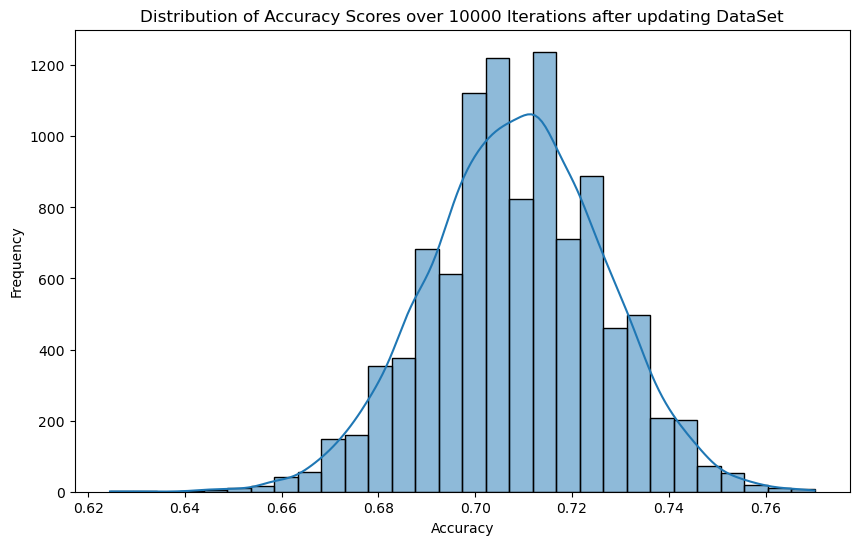

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Load dataset
df = pd.read_csv("Jupyter Notebooks/DataSets/NewDataset4.csv")

# Separate features and target
X = df.drop(columns=['Cipher'])
y = df['Cipher']

# Convert categorical data in X to numeric using LabelEncoder
label_encoders = {}  # To store label encoders for each categorical column
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is of type object (string)
        label_encoder = LabelEncoder() 
        X[column] = label_encoder.fit_transform(X[column])
        label_encoders[column] = label_encoder

# Initialize list to store accuracy scores
accuracy_scores = []

# Run the model 1000 times
for i in range(10000):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Initialize and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate accuracy and append to the list
    score = accuracy_score(y_test, predictions)
    accuracy_scores.append(score)

# Convert the list to a numpy array for easier manipulation
accuracy_scores = np.array(accuracy_scores)

# Plot the distribution of accuracy scores
plt.figure(figsize=(10, 6))
sns.histplot(accuracy_scores, bins=30, kde=True)
plt.title('Distribution of Accuracy Scores over 10000 Iterations after updating DataSet')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

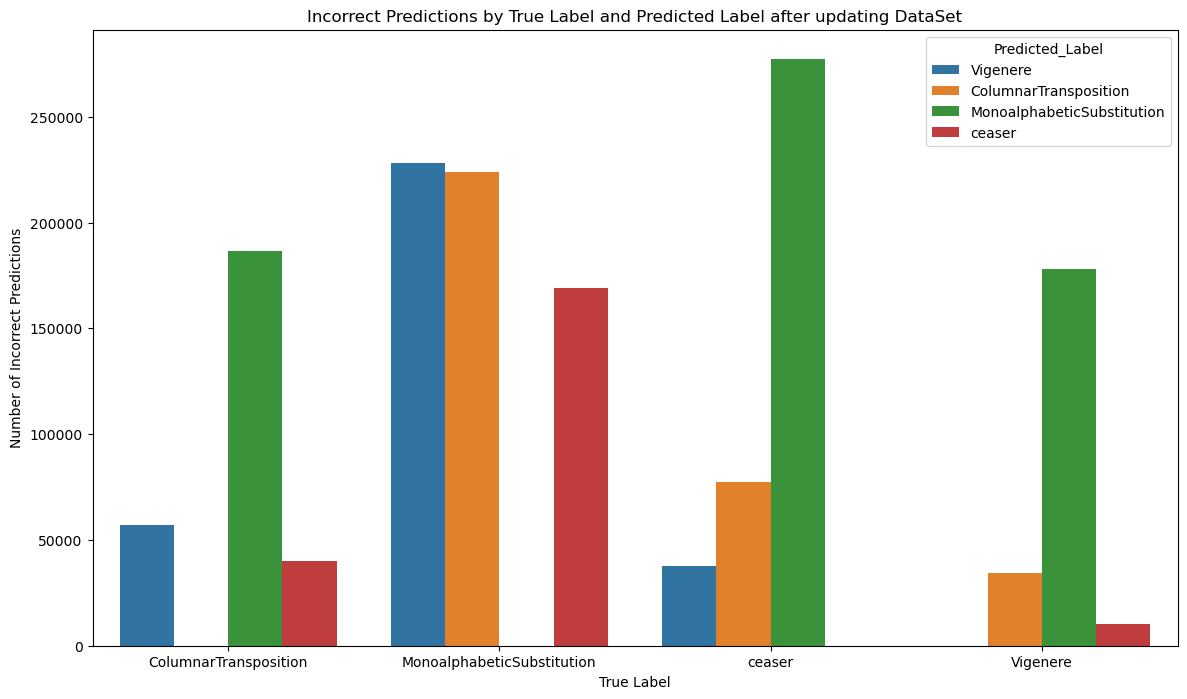

In [7]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load dataset
df = pd.read_csv("Jupyter Notebooks/DataSets/NewDataset4.csv")

# Separate features and target
X = df.drop(columns=['Cipher'])
y = df['Cipher']

# Convert categorical data in X to numeric using LabelEncoder
label_encoders = {}  # To store label encoders for each categorical column
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is of type object (string)
        label_encoder = LabelEncoder()
        X[column] = label_encoder.fit_transform(X[column])
        label_encoders[column] = label_encoder

# Initialize a Counter to store incorrect predictions
incorrect_predictions = Counter()

# Run the model 1000 times
for i in range(10000):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Initialize and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Find incorrect predictions and update the counter
    for true_label, predicted_label in zip(y_test, predictions):
        if true_label != predicted_label:
            incorrect_predictions[(true_label, predicted_label)] += 1

# Convert the Counter object to a DataFrame for easier plotting
incorrect_df = pd.DataFrame(incorrect_predictions.items(), columns=['True_Predicted', 'Count'])
incorrect_df['True_Label'] = incorrect_df['True_Predicted'].apply(lambda x: x[0])
incorrect_df['Predicted_Label'] = incorrect_df['True_Predicted'].apply(lambda x: x[1])

# Plot the incorrect predictions
plt.figure(figsize=(14, 8))
sns.barplot(data=incorrect_df, x='True_Label', y='Count', hue='Predicted_Label')
plt.title('Incorrect Predictions by True Label and Predicted Label after updating DataSet')
plt.xlabel('True Label')
plt.ylabel('Number of Incorrect Predictions')
plt.show()

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Modello sostituito
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Caricamento del dataset
df = pd.read_csv("Jupyter Notebooks/DataSets/NewDataSet4.csv")

# Separazione delle caratteristiche e del target
X = df.drop(columns=['Cipher'])
y = df['Cipher']

# Preparazione dei dati: Encoding delle colonne di tipo oggetto (stringhe) usando LabelEncoder
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':  
        label_encoder = LabelEncoder()
        X[column] = label_encoder.fit_transform(X[column])
        label_encoders[column] = label_encoder

# Encoding del target y
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Divisione dei dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Inizializzazione e addestramento del modello RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Valutazione del modello
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Salvataggio del modello e dei LabelEncoders
joblib.dump({'model': model, 'label_encoders': label_encoders, 'target_encoder': target_encoder}, 'NuovoModello.joblib')

print("Modello e LabelEncoder salvati con successo definitivo.")


Accuracy on test set: 0.70
Modello e LabelEncoder salvati con successo definitivo.
